# Map charts

1. Import modules

In [1]:
# coding: utf-8
import csv
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
import matplotlib.pyplot as plt

2. Plot different types of map charts

The orthographic projection displays the earth as a satellite (in an orbit infinitely high above the earth) would see it

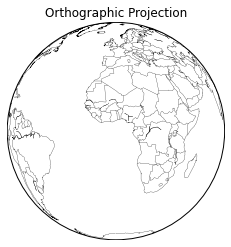

In [2]:
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=0,lon_0=0,resolution='c')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
plt.title('Orthographic Projection')
plt.show()

Let's change some chart specifications

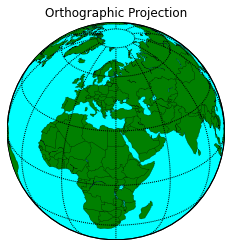

In [3]:
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=30,lon_0=30,resolution='c') #lat and lon options rotate globe
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
map.fillcontinents(color='green',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
plt.title('Orthographic Projection')
plt.show()

Mercator Projection is a cylindrical, conformal projection. 

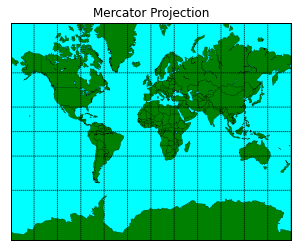

In [4]:
map = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='green',lake_color='aqua')
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
plt.title('Mercator Projection')
plt.show()

Mercator Projection has a very large distortion at high latitudes, cannot fully reach the polar regions.

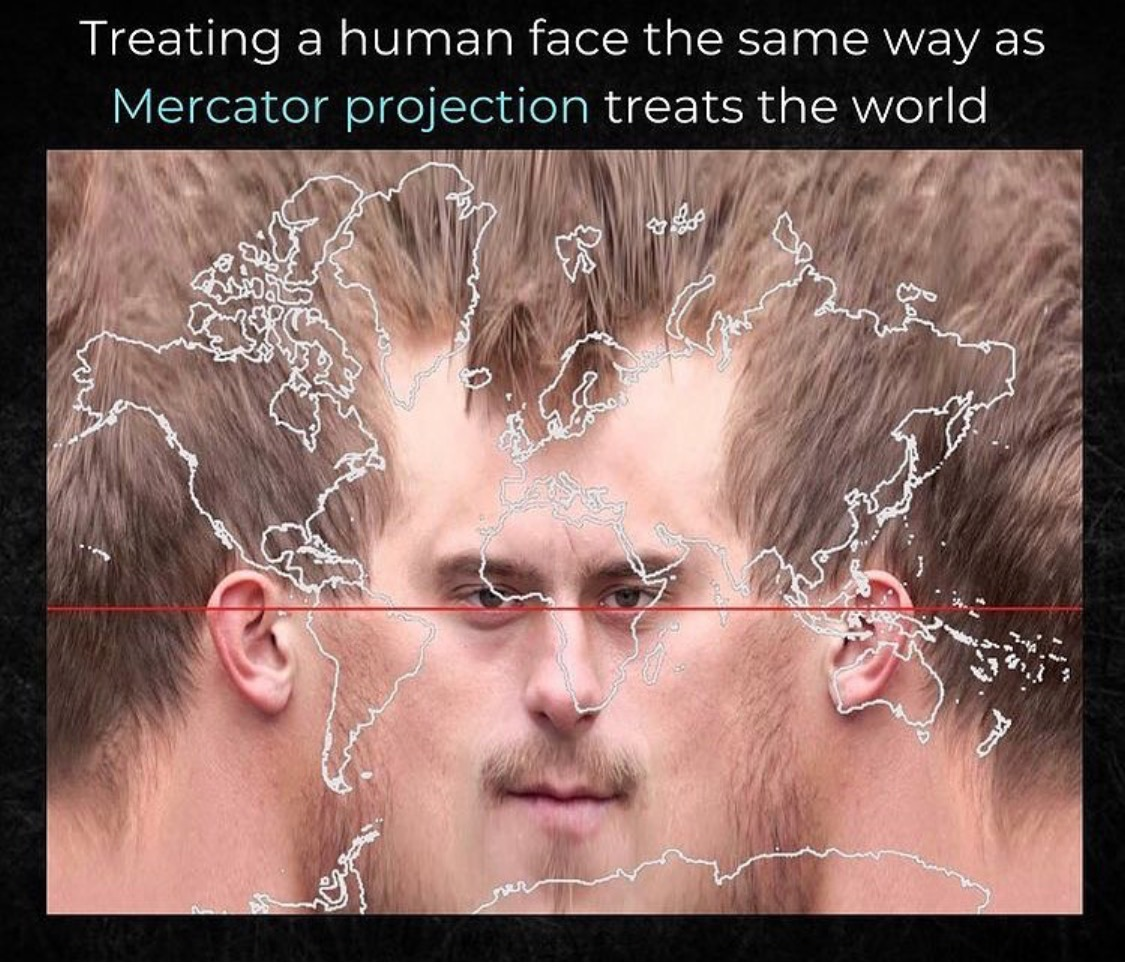

In [5]:
from IPython.display import Image
Image("/Users/tetianayukhymenko/Documents/Code/merc_face.jpeg", width=500, height=500)

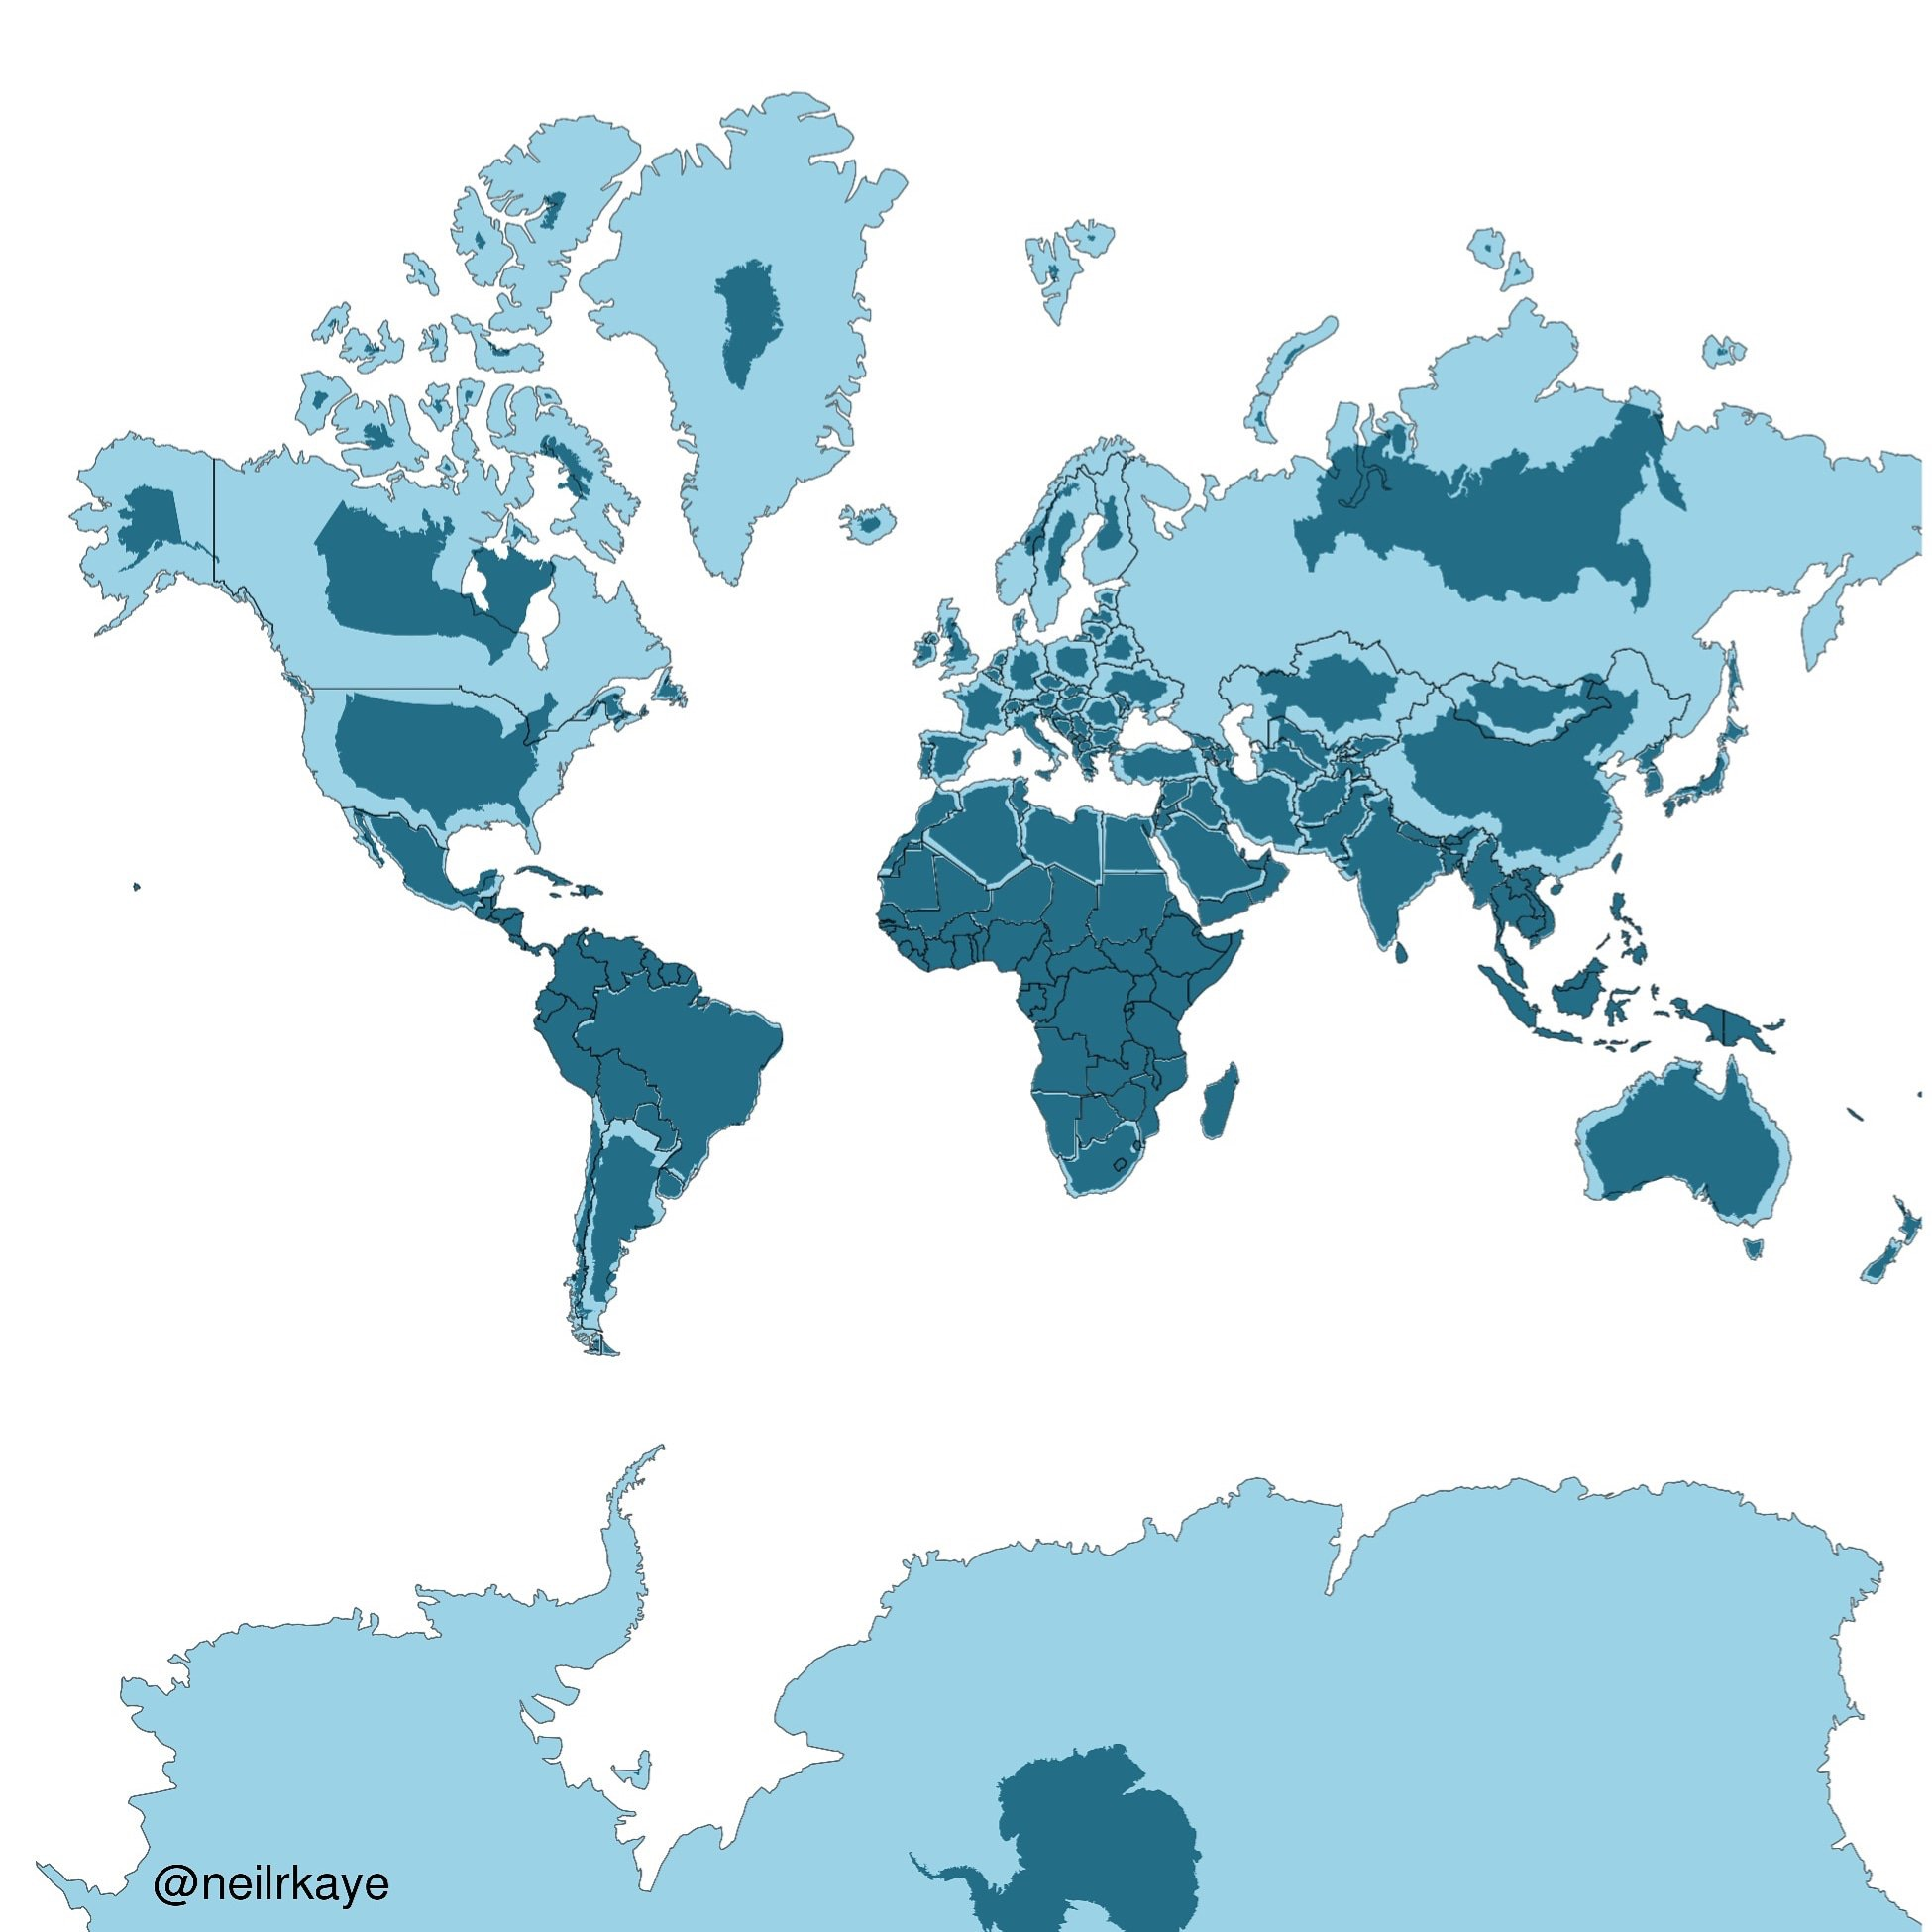

In [6]:
Image("/Users/tetianayukhymenko/Documents/Code/cont_size.jpg", width=500, height=500)

Robinson Projection is a global projection once used by the National Geographic Society for world maps.

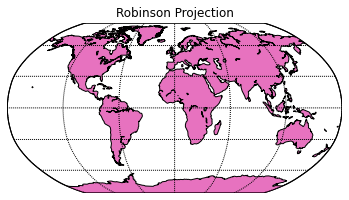

In [7]:
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawcoastlines()
aqua_color = (1, 1, 1, 1.0) #it is possible to set any color for map projections using RGB
coast_color = (222/255.0, 54/255, 165/255.0, 0.7)
m.fillcontinents(color=coast_color,lake_color=aqua_color)
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
m.drawmapboundary(fill_color=aqua_color)
plt.title("Robinson Projection")
plt.show()

Albers Equal Area Projection. On a equal-area projection, the area is preserved but the shape is not.

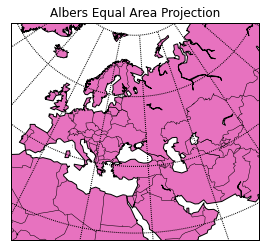

In [8]:
# setup albers equal area conic basemap
# lat_1 is first standard parallel.
# lat_2 is second standard parallel.
# lon_0,lat_0 is central point.
m = Basemap(width=8000000,height=7000000,
            resolution='c',projection='aea',\
            lat_1=40.,lat_2=60,lon_0=35,lat_0=50)
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color=coast_color,lake_color=aqua_color)
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color=aqua_color)
plt.title("Albers Equal Area Projection")
plt.show()

Blue Marble surface

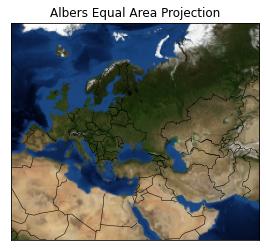

In [9]:
# setup albers equal area conic basemap
# lat_1 is first standard parallel.
# lat_2 is second standard parallel.
# lon_0,lat_0 is central point.
m = Basemap(width=8000000,height=7000000,
            resolution='c',projection='aea',\
            lat_1=40.,lat_2=60,lon_0=35,lat_0=50)
m.drawcountries()
m.bluemarble(scale=0.2)   # full scale will be overkill
plt.title("Albers Equal Area Projection")
plt.show()

In [10]:
df = pd.read_excel('/Users/tetianayukhymenko/Documents/Code/IKEA/Map.xlsx', index_col= False, header=0)
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    14 non-null     object 
 1   Number     14 non-null     int64  
 2   code       14 non-null     object 
 3   latitude   14 non-null     float64
 4   longitude  14 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 688.0+ bytes
None


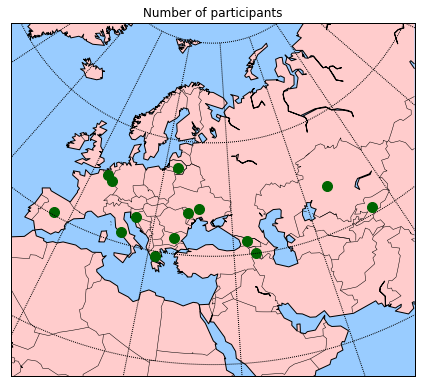

In [11]:
lats = df.latitude.tolist()
lons = df.longitude.tolist()
fig = plt.gcf()
fig.set_size_inches(8, 6.5)
coast_color = (255/255.0, 204/255, 204/255.0, 1)
aqua_color=(153/255.0, 204/255, 255/255.0, 1)
m = Basemap(width=8000000,height=7000000,
            resolution='c',projection='aea',\
            lat_1=40.,lat_2=60,lon_0=35,lat_0=50)
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color=coast_color,lake_color=aqua_color)
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color=aqua_color)

x, y = m(lons, lats)  # transform coordinates
plt.scatter(x, y, s=100, marker='o', color='DarkGreen',zorder=2) 
plt.title("Number of participants")
plt.show()

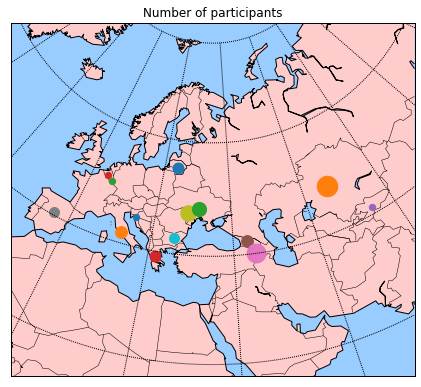

In [12]:
lats = df.latitude.tolist()
lons = df.longitude.tolist()
size = df.Number.tolist()
fig = plt.gcf()
fig.set_size_inches(8, 6.5)
m = Basemap(width=8000000,height=7000000,
            resolution='c',projection='aea',\
            lat_1=40.,lat_2=60,lon_0=35,lat_0=50)
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color=coast_color,lake_color=aqua_color)
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color=aqua_color)
x, y = m(lons, lats)  # transform coordinates
for i in range(len(lats)):
    plt.scatter(x[i], y[i], s=size[i]*20, marker='o', cmap='Viridis',zorder=2)
    plt.title("Number of participants")
plt.show()

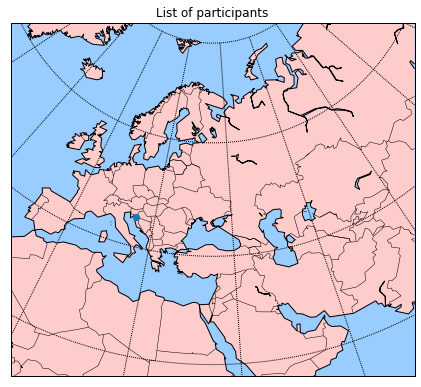

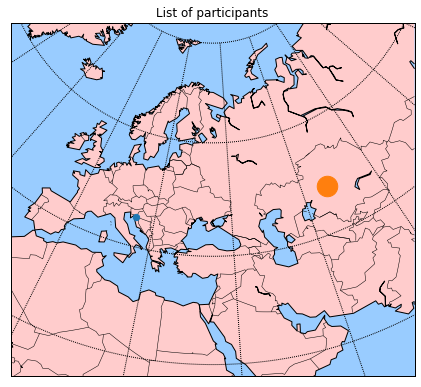

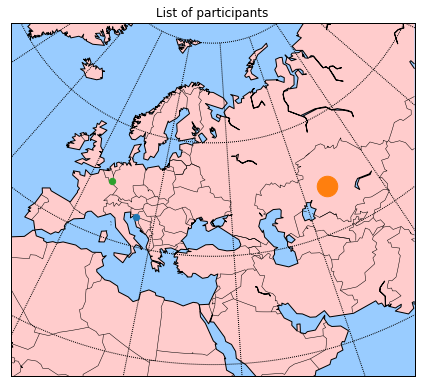

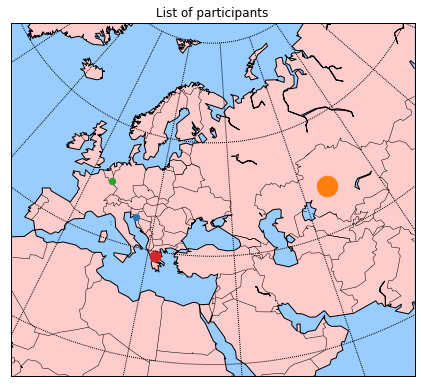

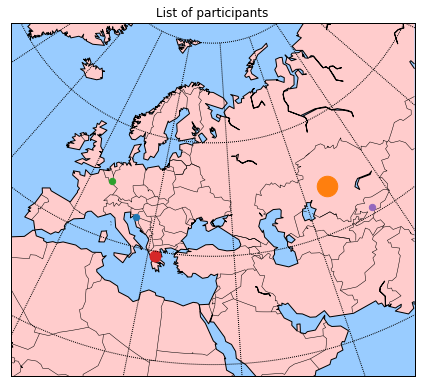

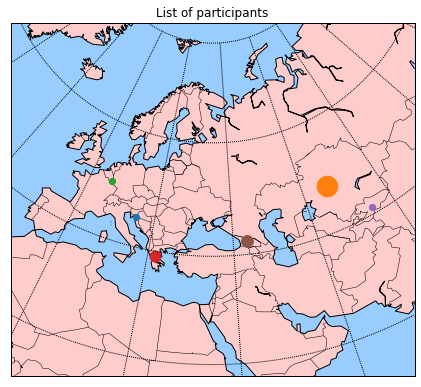

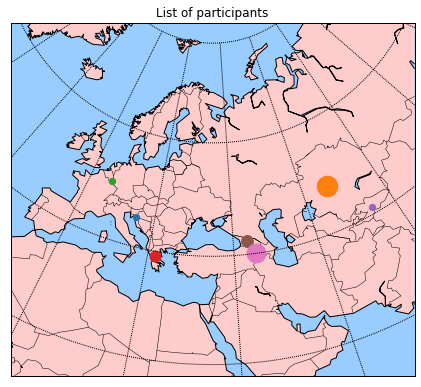

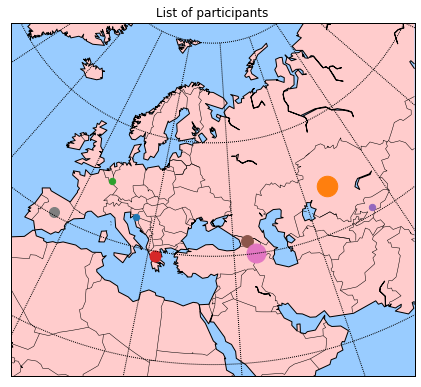

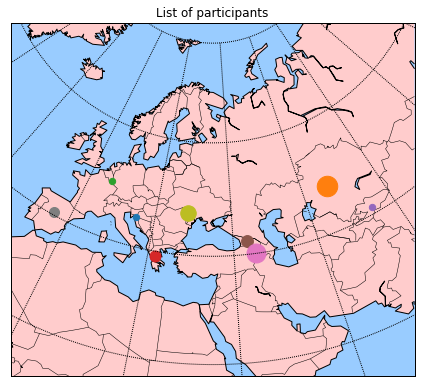

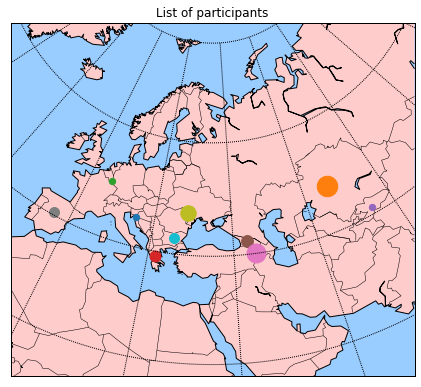

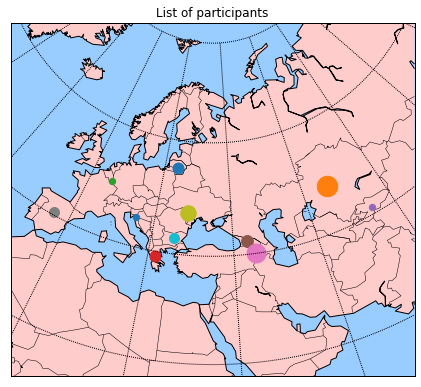

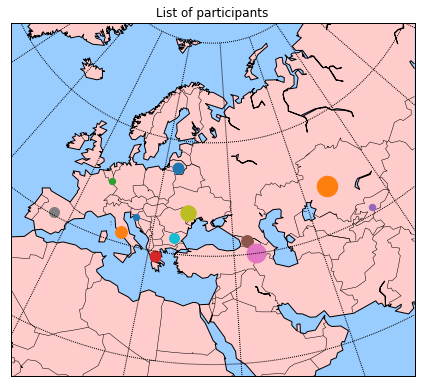

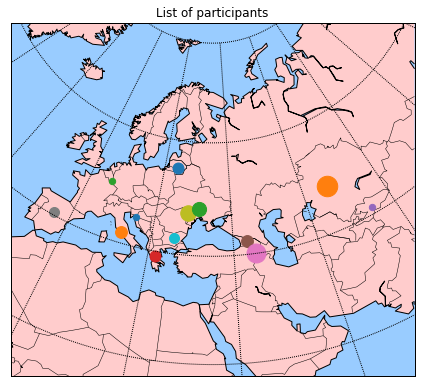

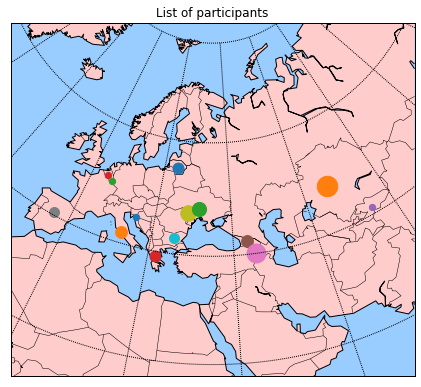

In [13]:
fig = plt.gcf()
fig.set_size_inches(8, 6.5)
x, y = m(lons, lats)  # transform coordinates
for j in range (1,len(lats)+1):
    fig = plt.gcf()
    fig.set_size_inches(8, 6.5)
    m = Basemap(width=8000000,height=7000000,
            resolution='c',projection='aea',\
            lat_1=40.,lat_2=60,lon_0=35,lat_0=50)
    m.drawcoastlines()
    m.drawcountries()
    m.fillcontinents(color=coast_color,lake_color=aqua_color)
    # draw parallels and meridians.
    m.drawparallels(np.arange(-80.,81.,20.))
    m.drawmeridians(np.arange(-180.,181.,20.))
    m.drawmapboundary(fill_color=aqua_color)
    for i in range(j):
        plt.scatter(x[i], y[i], s=size[i]*20, marker='o', cmap='Viridis',zorder=2)
        plt.title("List of participants")
    plt.savefig("Map/map_"+str(j).zfill(2)+".png", format='png', bbox_inches='tight') #this one should be before plt.show()
    plt.show()

In [14]:
import imageio
import os

folder = '/Users/tetianayukhymenko/Documents/Code/Map' 
files = [f"{folder}/{file}" for file in os.listdir(folder)]
print (files)

images = [imageio.imread(file) for file in sorted(files)]
imageio.mimwrite('map/map.gif', images, fps=1)

['/Users/tetianayukhymenko/Documents/Code/Map/map_09.png', '/Users/tetianayukhymenko/Documents/Code/Map/map_08.png', '/Users/tetianayukhymenko/Documents/Code/Map/map_06.png', '/Users/tetianayukhymenko/Documents/Code/Map/map_12.png', '/Users/tetianayukhymenko/Documents/Code/Map/map_13.png', '/Users/tetianayukhymenko/Documents/Code/Map/map_07.png', '/Users/tetianayukhymenko/Documents/Code/Map/map_11.png', '/Users/tetianayukhymenko/Documents/Code/Map/map_05.png', '/Users/tetianayukhymenko/Documents/Code/Map/map_04.png', '/Users/tetianayukhymenko/Documents/Code/Map/map_10.png', '/Users/tetianayukhymenko/Documents/Code/Map/map_14.png', '/Users/tetianayukhymenko/Documents/Code/Map/map_01.png', '/Users/tetianayukhymenko/Documents/Code/Map/map_03.png', '/Users/tetianayukhymenko/Documents/Code/Map/map_02.png']
